<a href="https://colab.research.google.com/github/aneeshbal/SimpylCellCounter/blob/master/examples/2x/scc2_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize Session

##### 1. First step, go to "Runtime" -> "Change runtime type", under "Hardware Accelerator, select "GPU"

In [29]:
# please note that tensorflow version 1.0 is selected since original model was created in 1.0

import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import os
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import get_file

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### 2. Connect your google drive to the colab session

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


##### 3. Read in functions and load model

In [3]:
%cd /content/drive/My Drive
!git clone https://github.com/aneeshbal/SimpylCellCounter.git
%cd /content/drive/My Drive/SimpylCellCounter/scc/2x

/content/drive/My Drive
Cloning into 'SimpylCellCounter'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 814 (delta 10), reused 25 (delta 6), pack-reused 784
Receiving objects: 100% (814/814), 88.94 MiB | 21.33 MiB/s, done.
Resolving deltas: 100% (350/350), done.
Checking out files: 100% (49/49), done.
/content/drive/My Drive/SimpylCellCounter/scc/2x


In [11]:
import scc2
model = load_model('fosFluor3.h5', 
                   custom_objects={'combine_loss': scc2.LoadingModel.combine_loss,
									                 'iou_coef': scc2.LoadingModel.iou_coef})

## Upload Data



##### 4. Under the main "My Drive" folder, upload a folder with your images...wait a few minutes since sometimes the sync can be slow

## Run SCC

##### 5. For the "image_path" variable, type in the appropriate folder name that contains your images

In [14]:
image_path = '/content/drive/My Drive/imageSamples' # replace 'imageSamples' with appropriate folder name

In [15]:
roots = []
[roots.append(root) for root, dirs, files in os.walk(image_path)]
roots.pop(0)
roots 
## ensure that the printed output looks correct in terms of where the images are located within the images folder

['/content/drive/My Drive/imageSamples/G',
 '/content/drive/My Drive/imageSamples/D',
 '/content/drive/My Drive/imageSamples/Q',
 '/content/drive/My Drive/imageSamples/B']

In [48]:
## rememeber, scc 2x is a fully deep learning model...therefore
## parameter selection is not supported at this moment (radius, threshold, etc...)
## SCC 2x will simply output the number of cells detected along with an image representation



output = []
img_track = []
output_mask = []
for p in tqdm(roots):
  images = os.listdir(p)
  for im in images:
    img_path = os.path.join(p, im)
    img = cv2.imread(img_path)
    
    mask = scc2.ProcessMasks.create_mask(img, model)
    count, paste = scc2.ProcessMasks.process_masks(mask[0,:,:,0], img)
    
    output.append(count)
    img_track.append(im)
    output_mask.append(paste)

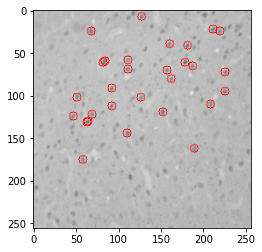

In [46]:
# sample visual of an image...change value of "o" to see other images

o = 5
plt.imshow(output_mask[o])

## Save Output

In [ ]:
from time import gmtime, strftime
save_output = pd.DataFrame({'image':img_track,'counts':output})
save_output.set_index('image')
save_output.to_csv('/content/drive/My Drive/scc_output{}.csv'.format(strftime("%Y-%m-%d %H:%M:%S", gmtime())))